In [49]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

##First Task
Parse the references file with regular expressions and write all ftp links from there into the ftps file

In [50]:
table = pd.read_csv('/content/references.txt', sep='\t')

In [51]:
ftp_file = open("ftp.txt", "w+")

for i in table:
    s = table[i].astype('str')
    res = s.str.findall(r'^ftp\..+')
    res = list(filter(None, res))
    for j in res:
        ftps = j[0].split(';')
        for k in range(len(ftps) - 1):
            ftp_file.write(ftps[k] + '\n')

ftp_file.close()

##Second Task
Extract all the numbers from the story 2430 A.D.

In [52]:
with open('/content/2430AD.txt', 'r') as f:
  all_num = []
  for line in f.readlines():
    num = re.findall(r'\d{1,}', line)
    if len(num) >= 1 :
      all_num.append(num)
print(all_num)

[['2430'], ['1969'], ['2430'], ['2430'], ['57', '57'], ['1970', '3', '68', '35', '460', '2430']]


##Third Task
From the same story, extract all the words that have the letter 'a' in them, no matter the case

In [53]:
with open('/content/2430AD.txt', 'r') as f:
  a_words = []
  for line in f.readlines():
    words = re.findall(r'\b\w+?[a]\w+\b', line, flags=re.IGNORECASE)
    if len(words) >= 1:
      for word in words:
        a_words.append(word)

    #a_words.append(word[0])
print(a_words)



['dawn', 'have', 'nightmare', 'gleam', 'original', 'personality', 'packed', 'talk', 'said', 'Alvarez', 'said', 'Social', 'eventually', 'character', 'escaped', 'talking', 'irritates', 'past', 'tact', 'Trail', 'was', 'always', 'sparsely', 'have', 'taken', 'Alvarez', 'walking', 'Alvarez', 'was', 'tall', 'rather', 'muscular', 'stairs', 'rampways', 'instance', 'character', 'sunlamps', 'was', 'pale', 'said', 'want', 'can', 'have', 'square', 'space', 'has', 'apartment', 'Rather', 'way', 'said', 'Alvarez', 'Alvarez', 'matter', 'reach', 'peak', 'reach', 'reach', 'goal', 'mankind', 'said', 'that', 'way', 'that', 'against', 'plastic', 'passed', 'saw', 'distance', 'was', 'plankton', 'varieties', 'that', 'far', 'was', 'giant', 'leading', 'large', 'far', 'leading', 'destination', 'was', 'back', 'that', 'thousands', 'had', 'passed', 'was', 'intangible', 'space', 'wall', 'was', 'blank', 'was', 'said', 'Alvarez', 'Inhuman', 'Literally', 'said', 'easy', 'signaled', 'waited', 'disregarded', 'manner', 'wa

## Fourth task 
Extract all exclamatory sentences from the story

In [54]:
with open('/content/2430AD.txt', 'r') as f:
  exclamation = []
  for line in f.readlines():
    exc= re.findall(r'[^\."]+!', line)
    if len(exc) >= 1:
       exclamation.append(exc[0])
print(exclamation)

['Yes!', 'Literally!', ' There was once a time! Centuries ago!', 'Think, Cranwitz!', 'If we succeed!']


##Fifth task 
Plot a histogram of the length distribution of unique words (not case-sensitive, length from 1) in the text

In [55]:
with open('/content/2430AD.txt', 'r') as f:
  unix_word = {}
  for line in f.readlines():
    words = re.findall(r'[a-z]+?\b ', line, flags=re.IGNORECASE)
    for word in words:
      w = word.lower()
      w = w.rstrip()
      if w not in unix_word.keys():
        unix_word[w] = len(w)
table_words = pd.DataFrame(list(unix_word.items()),
                   columns=['word', 'lenght'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'count')

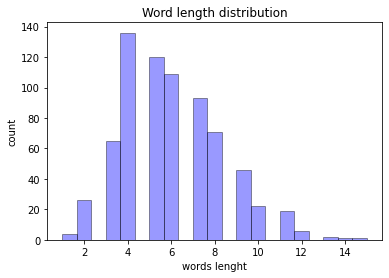

In [56]:
sns.distplot(table_words['lenght'], hist=True, kde=False,
            color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.title('Word length distribution')
plt.xlabel('words lenght')
plt.ylabel('count')

##Sixth task
Make a translator function from Russian to "brick language"

In [57]:
def brick_translator (filepath):
    translated_text = open('translated_text', 'w+')
    dct = {'а': 'ака',
         'о': 'око',
         'и': 'ики',
         "ы": "ыкы",
         "у":"уку",
         "э": "экэ",
         "я": "якя",
         "ю":"юкю",
         "ё":"ёкё",
         "е":"еке"}
    with open(filepath, 'r') as f:
        t_word = ''
        for line in f.readlines():
            words = re.findall(r'[а-я]+?\b', line, flags=re.IGNORECASE)
            
            for word in words:
                for j in word:
                    if j in dct.keys():
                        t_word += dct[j]
                    else:
                        t_word += j
                t_word += ' '
                translated_text.write(t_word + ' ')
        return t_word

In [58]:
brick_translator ('/content/test.txt')

'Прикивекет экэтоко проковекеркака '